# Contents

1. [import the necessary libraries](#import-the-necessary-libraries)
2. [Histogram](#Histogram)
3. [Note that](#Note-that)
4. [when plotting the histogram of an image](#when-plotting-the-histogram-of-an-image)
5. [Task 1: JPEG Compression:](#Task-1:-JPEG-Compression:)
6. [Mean Square Error (MSE)](#Mean-Square-Error-(MSE))
7. [Peak Signal to Noise ratio (PNSR)](#Peak-Signal-to-Noise-ratio-(PNSR))
8. [Structural similarity index (SSIM)](#Structural-similarity-index-(SSIM))
9. [Finally](#Finally)
10. [Task 2: Upsampling:](#Task-2:-Upsampling:)
11. [The upscaling factor](#The-upscaling-factor)
12. [Next](#Next)
13. [Final](#Final)
14. [Task 3: Downsampling](#Task-3:-Downsampling)

# import the necessary libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import os

In [2]:
# Read the image
image = Image.open(r'C:\Users\Magda\Documents\Term 6\DIP\7th mini project\mini2.jpg')

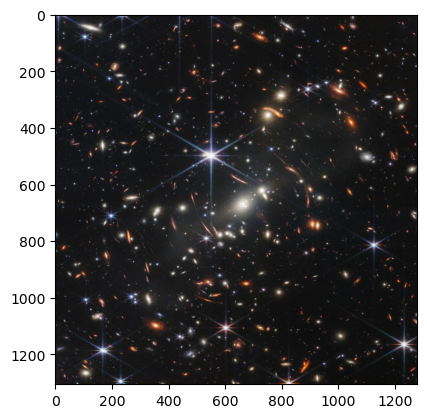

In [3]:
#Plot the image using the plt.imshow() function:
plt.imshow(image)
plt.show()

# Histogram

When we want to plot a histogram of an image, we need to convert the image into a list of numbers, which we call an array. This is because a histogram is a graph that shows how many times each number in a list appears. In the case of an image, each pixel has a number that represents its brightness or color, and we want to see how many pixels have each brightness or color value. By converting the image to an array, we can easily count how many pixels have each value, and then plot the histogram to see the distribution of pixel values in the image.

In [4]:
# Convert the image to an array
image_array = np.asarray(image)

The code first selects the red, green, and blue color channels of the image array using indexing. Then, it flattens each color channel into a 1D array using the ravel() function.

In [5]:
# Calculate the histograms for each color channel
#np.histogram() function is then used to calculate the histogram for each color
red_hist, bins = np.histogram(image_array[:,:,0].ravel(), bins=256, range=(0, 256))
green_hist, bins = np.histogram(image_array[:,:,1].ravel(), bins=256, range=(0, 256))
blue_hist, bins = np.histogram(image_array[:,:,2].ravel(), bins=256, range=(0, 256))

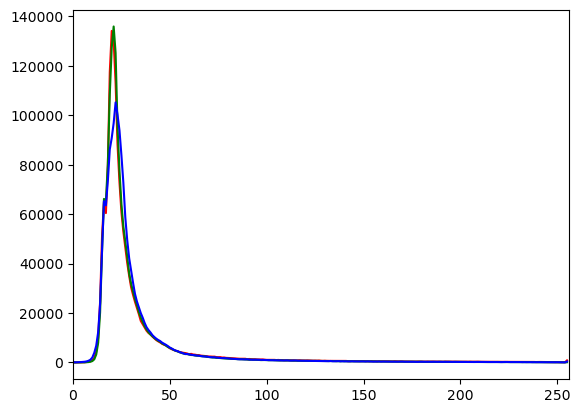

In [6]:
# Plot the histograms
plt.plot(red_hist, color='red')
plt.plot(green_hist, color='green')
plt.plot(blue_hist, color='blue')
plt.xlim([0, 256])
plt.show()

# Note that

in the numpy.histogram() function, the ravel() method is used to flatten the array of each color channel into a 1-dimensional array, and the bins parameter specifies the number of bins to use for the histogram, while the range parameter specifies the range of pixel intensities to include in the histogram. In this case, we set the range to (0, 256) to include all possible pixel intensities.

# when plotting the histogram of an image

it is often useful to convert the image to grayscale first. This is because the histogram of a grayscale image shows the distribution of pixel intensities across the entire image, whereas the histogram of a color image shows the distribution of intensities for each channel (red, green, and blue) separately.
By converting the image to grayscale, we can get a more accurate representation of the overall distribution of the pixel intensities in the image

In [7]:
# Convert the image to an array
gray_image = image.convert("L")

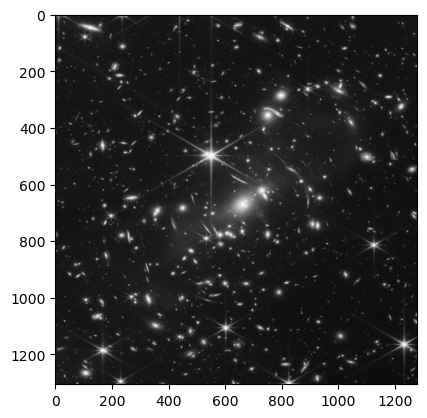

In [8]:
# Plot the image
plt.imshow(gray_image, cmap='gray')
plt.show()

In [9]:
# Calculate the histogram
histogram = gray_image.histogram()

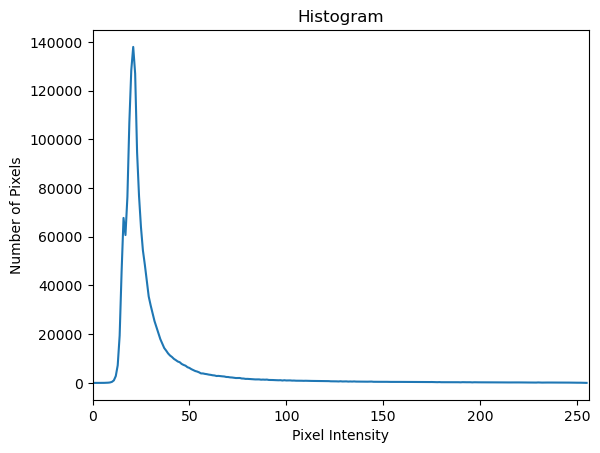

In [10]:
# Plot the histogram
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])
plt.show()

# Task 1: JPEG Compression:


Compression is used to reduce the size of files and make them easier to store, transmit, and process.

In [11]:
# Define the quality values to use for compression
quality_list = [25, 50, 75, 100]

 higher quality value results in less compression and a higher quality image, but also a larger file size. Conversely, a lower quality value results in more compression and a smaller file size, but also a lower quality image with more artifacts.

 We  create a directory to store the compressed images using the os.mkdir() function.

In [12]:
# Create a directory to store the compressed images
if not os.path.exists('Compressed Images'):
    os.mkdir('Compressed Images')

In [13]:
# Compress the image using JPEG compression with different qualities
for quality in quality_list:
    # Set the file name and path for the compressed image
    file_name = 'Compressed Images/quality_{}.jpg'.format(quality)
    #The {} serves as a placeholder for the quality value.
    #.format(quality): This is a method that replaces the {} placeholder with the value of the quality variable.

    # Compress the image using JPEG compression with the specified quality
    image.save(file_name, 'JPEG', quality=quality)
    
    
#Putting it all together, the file_name variable will be a string that specifies the file path and name for 
#the compressed image based on the quality value.

In [14]:
# Initialize lists to store the metrics for each compressed image
file_sizes = []
mse_values = []
psnr_values = []
ssim_values = []

We loop through the quality values and compress the image using JPEG compression with the specified quality using the image.save() function. We save each compressed image to the 'Compressed Images' directory with a file name that includes the quality value.

We then calculate the file sizes, MSE values, PSNR values, and SSIM values for each compressed image.

We store these values in lists and use them to plot a bar graph using the matplotlib.pyplot.bar() function.

In [15]:
# Loop through the compressed images and calculate the metrics
for quality in quality_list:
    # Set the file name and path for the compressed image
    file_name = 'Compressed Images/quality_{}.jpg'.format(quality)

    # Open the compressed image as a PIL image
    compressed_image = Image.open(file_name)
                             
    # Calculate the file size of the compressed image
    file_size = os.path.getsize(file_name)
    file_sizes.append(file_size)

    # Convert the compressed image to a numpy array
    compressed_array = np.array(compressed_image)

    # Calculate the mean squared error (MSE) between the original and compressed images
    mse = mean_squared_error(image_array, compressed_array)
    mse_values.append(mse)

    # Calculate the peak signal to noise ratio (PSNR) between the original and compressed images
    psnr = peak_signal_noise_ratio(image_array, compressed_array)
    psnr_values.append(psnr)

    # Calculate the structural similarity index (SSIM) between the original and compressed images
    ssim = structural_similarity(image_array, compressed_array, multichannel=True)
    ssim_values.append(ssim)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\1734021901.py:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image_array, compressed_array, multichannel=True)


The reason why the compressed image is converted to a NumPy array before calculating the metrics is because the mean_squared_error(), peak_signal_noise_ratio(), and structural_similarity() functions from the scikit-image library expect NumPy arrays as inputs.

# Mean Square Error (MSE)


stands for Mean Squared Error. It is a common metric used to measure the difference between two sets of data. In the context of image processing, it is often used to evaluate the performance of image compression algorithms or image restoration techniques.



MSE is calculated by taking the average of the squared differences between each pixel in the original image and its corresponding pixel in the compressed or restored image. Here's the formula for calculating MSE:

MSE = 1/n * Σ(i=1 to n) (I(i) - K(i))^2


where n is the total number of pixels in the image, I(i) is the intensity value of the ith pixel in the original image, and K(i) is the intensity value of the corresponding pixel in the compressed or restored image.


# Peak Signal to Noise ratio (PNSR)

is a widely used metric to measure the quality of a compressed or restored image. It is a measure of the ratio between the maximum possible signal level and the amount of noise in the signal after compression or restoration.

PSNR is expressed in decibels (dB) and is calculated using the mean squared error (MSE) as follows:

PSNR = 10 * log10((MAX^2) / MSE)
where MAX is the maximum pixel value of the image (e.g., 255 for an 8-bit grayscale image), and MSE is the mean squared error between the original and compressed/restored images.


Decibels (dB) are a logarithmic unit of measurement used to express the ratio between two quantities

# Structural similarity index (SSIM)

is a widely used metric for measuring the similarity between two images.

SSIM is calculated by comparing the structural similarity between the original and compressed/restored images. It is expressed as a value between -1 and 1, where a value of 1 indicates a perfect match between the two images, and a value of -1 indicates no similarity between the two images.

The formula for calculating SSIM involves three terms: luminance, contrast, and structure. Here's the formula:

SSIM(x, y) = (2 * μx * μy + c1) * (2 * σxy + c2) / ((μx^2 + μy^2 + c1) * (σx^2 + σy^2 + c2))
where x and y are the original and compressed/restored images, μ is the mean value of the image, σ is the standard deviation of the image, and c1 and c2 are two constants added to avoid division by zero.

The resulting SSIM value represents the similarity between the original and compressed/restored images. A higher SSIM value indicates a better match between the two images.

# Finally

we show the bar graphs for file sizes, MSE values, and PSNR values using the matplotlib.pyplot.show() function. We also show a separate bar graph for the SSIM values.

Text(0, 0.5, 'File Size (bytes)')

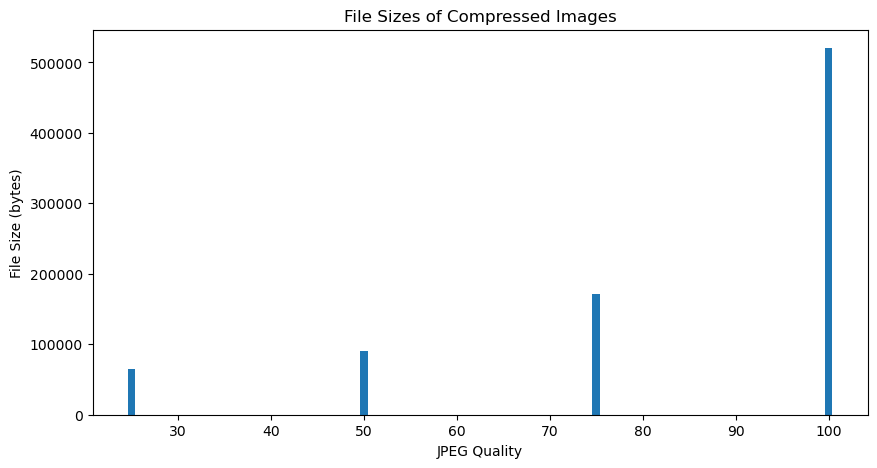

In [16]:
# Plot a bar graph to compare the file sizes of the compressed images
plt.figure(figsize=(10, 5))
plt.bar(quality_list, file_sizes)
plt.title('File Sizes of Compressed Images')
plt.xlabel('JPEG Quality')
plt.ylabel('File Size (bytes)')

Text(0, 0.5, 'MSE')

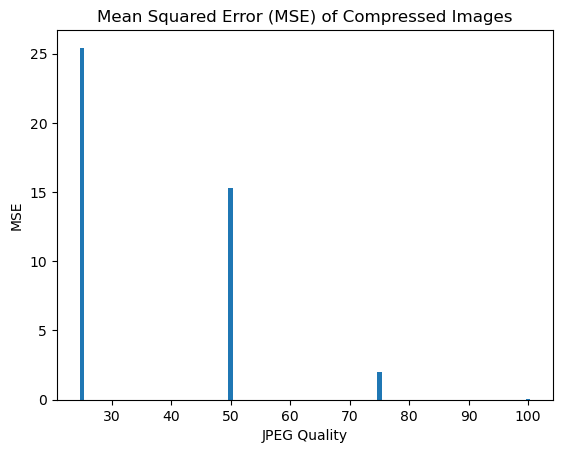

In [17]:
## Plot a bar graph to compare the MSE values of the compressed images
plt.bar(quality_list, mse_values)
plt.title('Mean Squared Error (MSE) of Compressed Images')
plt.xlabel('JPEG Quality')
plt.ylabel('MSE')

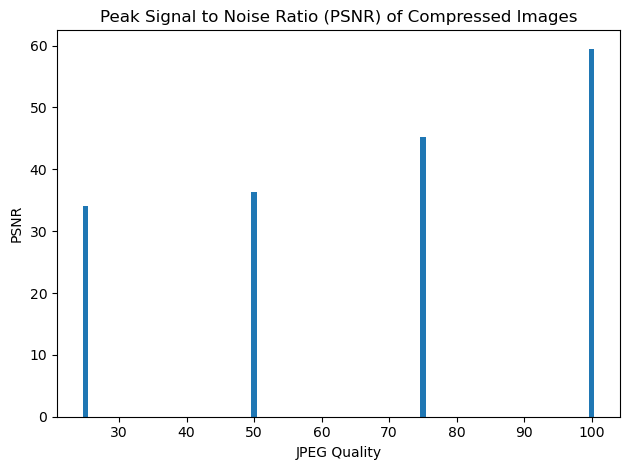

In [18]:
## Plot a bar graph to compare the PSNR values of the compressed images
plt.bar(quality_list, psnr_values)
plt.title('Peak Signal to Noise Ratio (PSNR) of Compressed Images')
plt.xlabel('JPEG Quality')
plt.ylabel('PSNR')

plt.tight_layout()
plt.show()

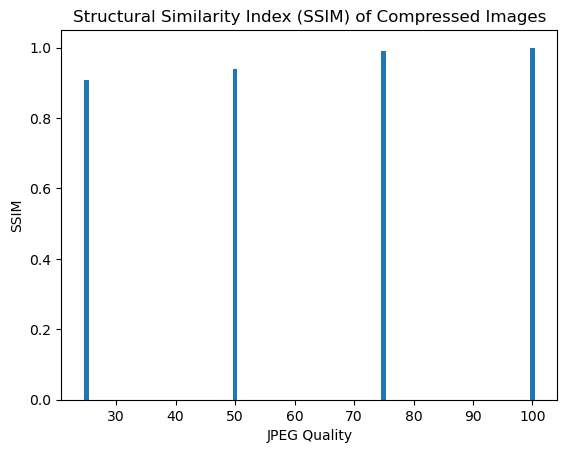

In [19]:
# Plot a bar graph to compare the SSIM values of the compressed images
plt.figure()
plt.bar(quality_list, ssim_values)
plt.title('Structural Similarity Index (SSIM) of Compressed Images')
plt.xlabel('JPEG Quality')
plt.ylabel('SSIM')
plt.show()

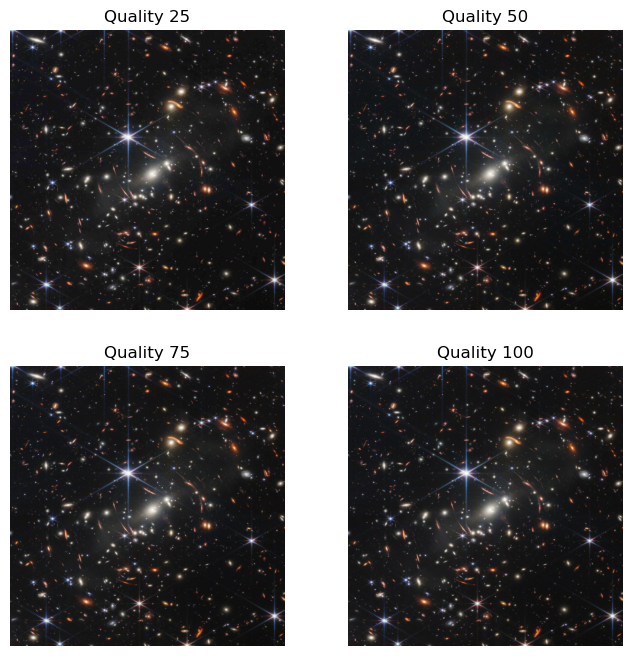

In [20]:
# Load the compressed images
compressed_images = []
for quality in quality_list:
    file_name = 'Compressed Images/quality_{}.jpg'.format(quality)
    compressed_image = Image.open(file_name)
    compressed_images.append(compressed_image)

# Create a figure with a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the compressed images in the subplots
for i, ax in enumerate(axes.flat):
    ax.imshow(compressed_images[i])
    ax.set_title('Quality {}'.format(quality_list[i]))
    ax.axis('off')

# Show the plot
plt.show()

# Task 2: Upsampling:

the process of increasing the resolution or size of an image by adding pixels

here's how to perform Nearest Neighbor Interpolation (from scratch), Bilinear Interpolation, and Bicubic Interpolation

In [21]:
def nearest_neighbor_interpolation(image, factor):
    # Get the dimensions of the original image
    width, height = image.size

    # Calculate the new dimensions of the upsampled image
    new_width, new_height = width * factor, height * factor

    # Create a new image with the upsampled dimensions
    upsampled_img = Image.new('RGB', (new_width, new_height))

    # Calculate the pixel values of the upsampled image using nearest neighbor interpolation
    # A nested loop that will iterate over every pixel in the upsampled image.
    for y in range(new_height):
        for x in range(new_width):
        # Calculate the corresponding pixel location in the original image for each pixel in the upsampled image.
            x_original = int(round(x / factor))
            y_original = int(round(y / factor))

            # Check if the pixel coordinates are within the range of the original image
            if x_original >= width:
                x_original = width - 1
            if y_original >= height:
                y_original = height - 1

            # Get the RGB value of the closest pixel in the original image
            pixel = image.getpixel((x_original, y_original))

            # Set the pixel value of the upsampled image
            upsampled_img.putpixel((x, y), pixel)

    return upsampled_img

we added two if statements to check if the x_original and y_original variables are within the range of the original image. If they are outside the range, we set them to the maximum valid value (i.e., width-1 or height-1) to avoid the IndexError when calling getpixel().

When we increase the size of an image using nearest neighbor interpolation, we need to fill in the new pixels that were not present in the original image. To do this, we need to determine the color of each new pixel based on the colors of the pixels in the original image that are closest to it.

The process of finding the corresponding pixel in the original image for each pixel in the upsampled image is known as mapping. We map each pixel in the upsampled image to the pixel in the original image that is closest to it.

Once we have mapped each pixel in the upsampled image to its corresponding pixel in the original image, we can retrieve the color of the original pixel and use it to fill in the color of the new pixel in the upsampled image.

This is why we need to find the corresponding pixel in the original image for each pixel in the upsampled image when increasing the size of an image using nearest neighbor interpolation.

We want to calculate the corresponding pixel location in the original image for each pixel in the upsampled image because we need to fill in the upsampled image with interpolated pixel values based on the neighboring pixels in the original image.

# The upscaling factor

is a scalar value that defines how much to increase the size of an image. For example, if the upscaling factor is 2, then the resulting image will have twice the width and height of the original image.

In [22]:
nni = nearest_neighbor_interpolation(image, 2)

# Next

let's use the built-in functions to perform Bilinear and Bicubic Interpolation:

In [23]:
# Define the upscaling factor
factor = 2

In [24]:
# Perform Bilinear Interpolation
bilinear_img = image.resize((image.size[0]*factor, image.size[1]*factor), resample=Image.BILINEAR)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\3465487121.py:2: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  bilinear_img = image.resize((image.size[0]*factor, image.size[1]*factor), resample=Image.BILINEAR)


In [25]:
# Perform Bicubic Interpolation
#weighted average of the 16 nearest pixels is used to determine the value of the new pixel. 
bicubic_img = image.resize((image.size[0]*factor, image.size[1]*factor), resample=Image.BICUBIC)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\1439455303.py:3: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  bicubic_img = image.resize((image.size[0]*factor, image.size[1]*factor), resample=Image.BICUBIC)


In the above code, image.resize() function is used to perform Bilinear and Bicubic Interpolation, where resample parameter is set to Image.BILINEAR and Image.BICUBIC, respectively.

# Final

let's visualize and compare the resulting images using the following code:

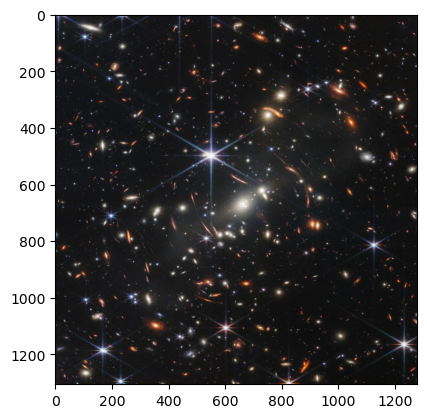

In [26]:
plt.imshow(image)
plt.show()

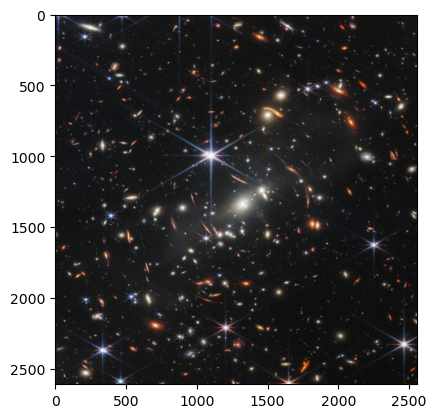

In [27]:
plt.imshow(nni)
plt.show()

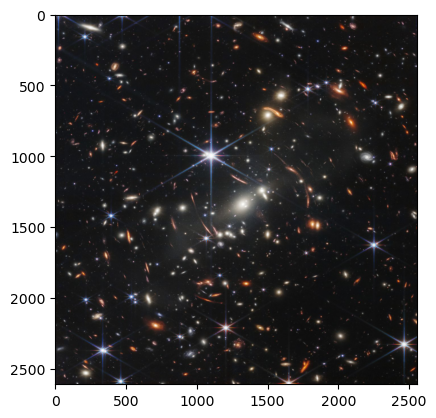

In [28]:
plt.imshow(bilinear_img)
plt.show()

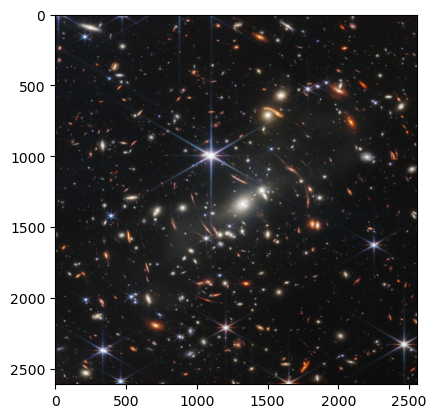

In [29]:
plt.imshow(bicubic_img)
plt.show()

In [30]:
# Get the dimensions of the original image
width, height = image.size

# Print the dimensions of the original image
print('Width:', width)
print('Height:', height)

Width: 1280
Height: 1306


In [31]:
# Get the dimensions of the original image
width, height = nni.size

# Print the dimensions of the original image
print('Width:', width)
print('Height:', height)

Width: 2560
Height: 2612


In [32]:
# Define the quality values to use for compression
Upsampling_list = ["nearest_neighbor", "bilinear_img", "bicubic_img"]

In [33]:
# Create a directory to store the compressed images
if not os.path.exists('Upsampling Images'):
    os.mkdir('Upsampling Images')

In [34]:
for up in Upsampling_list:
    # Set the file name and path for the compressed image
    file_name = 'Upsampling Images/Upsampling_{}.jpg'.format(up)

    # Save the upsampled images in the "Upsampling Images" folder
    image.save(file_name, 'JPEG', up=up)

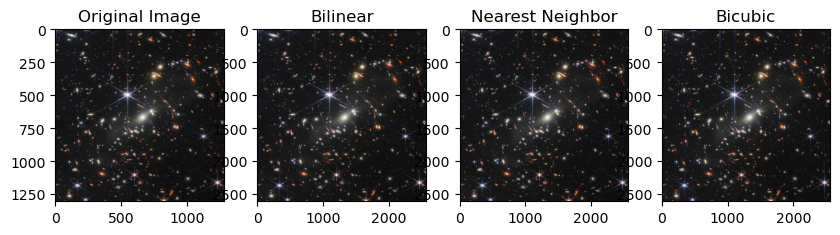

In [35]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(ncols=4, figsize=(10,5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(bilinear_img)
axes[1].set_title('Bilinear')
axes[2].imshow(nni)
axes[2].set_title('Nearest Neighbor')
axes[3].imshow(bicubic_img)
axes[3].set_title('Bicubic')
plt.show()

The fig variable contains the figure object, and the axes variable contains an array of the subplot objects.


# Task 3: Downsampling

the process of reducing the resolution or size of an image by removing pixels.

In [36]:
# Downsample using nearest neighbor interpolation
nearest_img = image.resize((image.width // 2, image.height // 2), resample=Image.NEAREST)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\3348248798.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  nearest_img = image.resize((image.width // 2, image.height // 2), resample=Image.NEAREST)


In [37]:
# Downsample using average pooling
average_img = image.resize((image.width // 2, image.height // 2), resample=Image.ANTIALIAS)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\1107766858.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  average_img = image.resize((image.width // 2, image.height // 2), resample=Image.ANTIALIAS)


In [38]:
# Downsample using max pooling
max_img = image.resize((image.width // 2, image.height // 2), resample=Image.BOX)

C:\Users\Magda\AppData\Local\Temp\ipykernel_13196\3204238740.py:2: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  max_img = image.resize((image.width // 2, image.height // 2), resample=Image.BOX)


In [39]:
Downsampling_list = ["nearest_img", "average_img", "max_img"]

In [40]:
if not os.path.exists('Downsampling Images'):
    os.mkdir('Downsampling Images')

In [41]:
for down in Downsampling_list:
    file_name = 'Downsampling Images/Downsampling_{}.jpg'.format(down)

    image.save(file_name, 'JPEG')

In [42]:
# Get the dimensions of the original image
width, height = nearest_img.size

print('Width:', width)
print('Height:', height)

Width: 640
Height: 653


In [43]:
# Get the dimensions of the original image
width, height = average_img.size

# Print the dimensions of the original image
print('Width:', width)
print('Height:', height)

Width: 640
Height: 653


In [44]:
# Get the dimensions of the original image
width, height = max_img.size

print('Width:', width)
print('Height:', height)

Width: 640
Height: 653


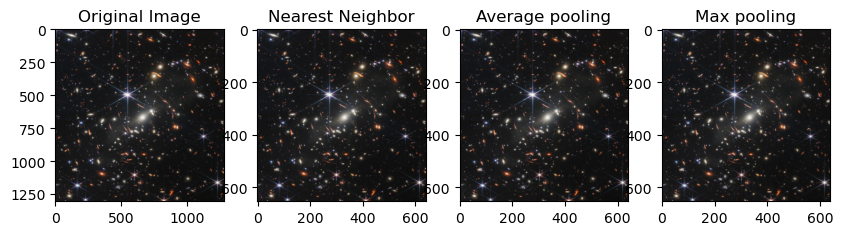

In [45]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(ncols=4, figsize=(10,5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(nearest_img)
axes[1].set_title('Nearest Neighbor')
axes[2].imshow(average_img)
axes[2].set_title('Average pooling')
axes[3].imshow(max_img)
axes[3].set_title('Max pooling')
plt.show()